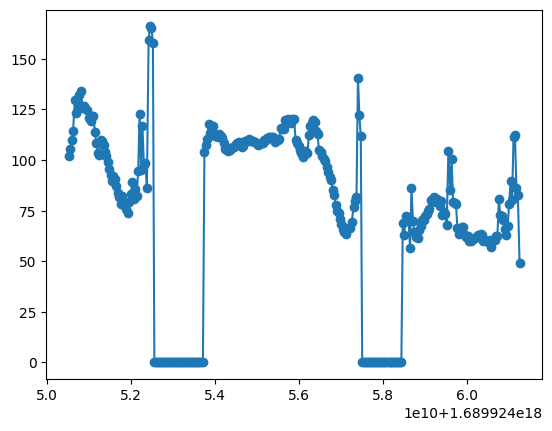

In [2]:
import numpy as np
t = np.load('outputs\CHI_ANGLE_1.npy')
import matplotlib.pyplot as plt
plt.plot(t[:, 1],t[:, 0], 'o-')
plt.show()

In [6]:
eeg = np.load('test_eeg.npy')
ang = np.load('test_angular.npy')
eeg.shape,  (ang[-1][1] - ang[0][1]) * 10**(-9)

((32, 359), 2.845327616)

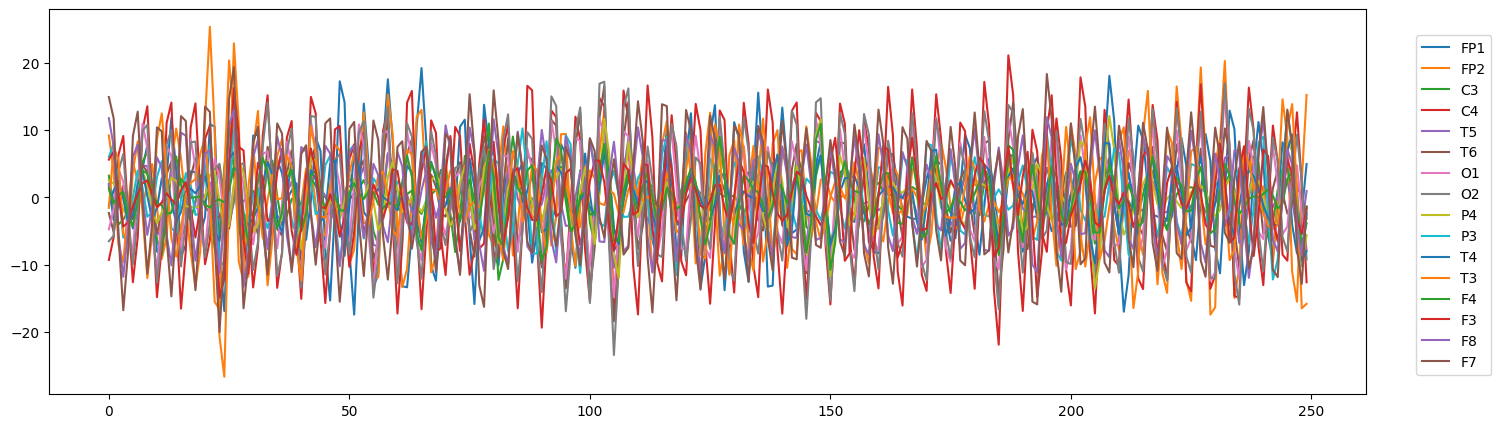

(31888.00698129607, -4898.451852613909, 67967.0951327199)

In [6]:
import pywt
from scipy.signal import butter, filtfilt, iirnotch
import numpy as np
import matplotlib.pyplot as plt

def bw_bandpass(data, lowcut, highcut, fs, order = 2):
    nyquist = fs * 0.5
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype = 'band', output = 'ba', analog = False)
    return filtfilt(b, a, data, axis = 1)

def bw_notch5060(data, fs, order = 2):
    nyquist = fs * 0.5
    bp50 = np.array([49.0, 51.0]) / nyquist
    bp60 = np.array([59.0, 61.0]) / nyquist

    b, a = butter(order, bp50, btype = 'bandstop', output = 'ba', analog = False)
    data = filtfilt(b, a, data, axis = 1)

    b, a = butter(order, bp60, btype = 'bandstop', output = 'ba', analog = False)
    data = filtfilt(b, a, data, axis = 1)
    return data
chs_map = {0: 'FP1', 1: 'FP2', 2: 'C3', 3: 'C4', 4: 'T5', 5: 
                        'T6', 6: 'O1', 7: 'O2', 8: 'P4', 9: 'P3', 10: 'T4', 11: 'T3', 12: 'F4', 13: 'F3', 14: 'F8', 15: 'F7'}

eeg = np.load('outputs/CHI_EEG_49.npy')[1:17]
#remove dc offset via simple mean
balanced_signal = eeg - np.mean(eeg)

#apply notch
filtered = bw_notch5060(balanced_signal, 125)
butterworth = bw_bandpass(filtered,13 , 32, 125,10)


# fig, axs = plt.subplots(1,2, figsize =(15,5))
# axs[0].plot(bw_notch5060(eeg, 125).T)
# axs[1].plot(balanced_signal.T)
# plt.show()


# eeg = bw_bandpass(eeg[1:17], 13, 8, 30, 10)
# eeg = bw_notch5060(eeg[1:17], 125)
target_plot = ['C3', 'C4', 'FP1', 'FP2', 'F8', 'F7']
# _,  axs = plt.subplots(1,3, figsize=(20,10))
# axs[0].plot(balanced_signal.T)
# axs[0].set_title('raw')
# axs[1].plot(filtered.T)
# axs[1].set_title('50 and 60Hz notch')
# axs[2].plot(butterworth.T, label = list(chs_map.keys()))
# axs[2].set_title('Butterworth fitler 1 - 50Hz')
plt.figure(figsize=(17,5))
for ch, sig in zip(list(chs_map.values()), butterworth):
    # if ch == 'T3' or ch == 'F4':
    #     continue
    # if ch in target_plot:
    plt.plot(sig[250:500], label = ch)
    
plt.legend(loc = 'upper right', bbox_to_anchor = (1.1, 0.95))
plt.show()

np.mean(eeg), np.min(eeg),np.max(eeg),